**Effect of the NaK scale value on the simulation output.**

This script was used to study the effect on the NaK scale value on the simulation results. The upper and lower bondaries can be changed to study specific parameter regiemes. 

In [2]:
import numpy as np
from scipy.integrate.odepack import odeint
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm

In [3]:
import functions
from chondrocyte import Voltage_clamp
from params import params_dict

In [4]:
# set time array
params_dict["t_final"] = 60000
t_final = params_dict["t_final"]
params_dict["dt"] = 1e-2
dt = params_dict["dt"]
t = np.linspace(0, t_final, int(t_final/dt))

In [5]:
lower = 0.1
params_dict["I_NaK_scale"] = lower
upper = 4.5

params_dict["clamp_Na_i"] = False
params_dict["clamp_K_i"] = False

0.1
0.5
0.9
1.3
1.7000000000000002
2.1
2.5
2.9
3.3
3.6999999999999997
4.1


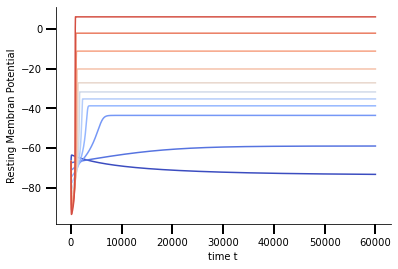

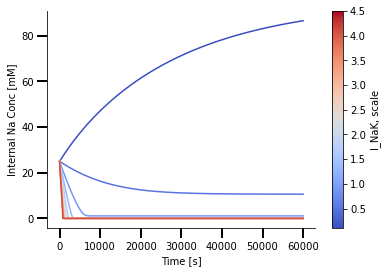

In [6]:
figs = []
axs = []
noPlots = 2

for i in range(noPlots):
    fig, ax = plt.subplots()
    figs.append(fig)
    axs.append(ax)

norm_range = matplotlib.colors.Normalize(vmin=lower, vmax=upper)
cmap = cm.coolwarm

while params_dict["I_NaK_scale"] < upper:
    
    params_dict["I_NaK_bar"] = params_dict["I_NaK_scale"]*70.8253*params_dict["C_m"]/params_dict["C_myo"]
    
    V_0 = params_dict["V_0"]
    Na_i_0 = params_dict["Na_i_0"]
    K_i_0 = params_dict["K_i_0"]
    Ca_i_0 = params_dict["Ca_i_0"]
    H_i_0 = params_dict["H_i_0"]
    Cl_i_0 = params_dict["Cl_i_0"]
    a_ur_0 = params_dict["a_ur_0"]
    i_ur_0 = params_dict["i_ur_0"]
    vol_i_0 = params_dict["vol_i_0"]
    cal_0 = params_dict["cal_0"]
    
    y0 = (V_0, Na_i_0, K_i_0, Ca_i_0, H_i_0, Cl_i_0, a_ur_0, i_ur_0, vol_i_0, cal_0)
    solution = odeint(functions.rhs, y0, t, args=(params_dict,))

    VV, current_dict = Voltage_clamp(solution, params_dict)
    
    axs[0].plot(t, solution[:,0], color=cmap(norm_range(params_dict["I_NaK_scale"])))
    axs[0].set_ylabel('Resting Membran Potential')
    axs[0].set_xlabel('time t')
    axs[0].xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    axs[0].yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['top'].set_visible(False)
    
    axs[1].plot(t, solution[:,1], color=cmap(norm_range(params_dict["I_NaK_scale"])))
    axs[1].set_ylabel('Internal Na Conc [mM]')
    axs[1].set_xlabel('Time [s]')
    axs[1].xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    axs[1].yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    
    params_dict["I_NaK_scale"] = params_dict["I_NaK_scale"] + 0.4

sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm_range)
sm.set_array([])
fig.colorbar(sm, label='I_NaK, scale')

plt.show()